In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split,RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
%matplotlib inline

In [2]:
df = pd.read_csv(r'''C:\Users\MiaZo_000\Desktop\LoanData.csv''',skiprows=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 145 entries, id to settlement_term
dtypes: float64(115), object(30)
memory usage: 47.1+ MB


C:\Users\MiaZo_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [4]:
df.select_dtypes(exclude='O').describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,42535.0,11089.722581,7410.938391,500.00,5200.000000,9700.000000,15000.000000,3.500000e+04
funded_amnt,42535.0,10821.585753,7146.914675,500.00,5000.000000,9600.000000,15000.000000,3.500000e+04
funded_amnt_inv,42535.0,10139.938785,7131.598014,0.00,4950.000000,8500.000000,14000.000000,3.500000e+04
installment,42535.0,322.623063,208.927216,15.67,165.520000,277.690000,428.180000,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.00,40000.000000,59000.000000,82500.000000,6.000000e+06
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,42535.0,13.373043,6.726315,0.00,8.200000,13.470000,18.680000,2.999000e+01
delinq_2yrs,42506.0,0.152449,0.512406,0.00,0.000000,0.000000,0.000000,1.300000e+01
inq_last_6mths,42506.0,1.081424,1.527455,0.00,0.000000,1.000000,2.000000,3.300000e+01


#### There are totally 145 variables and 42,542 observations. The loan_amnt is the taget variable. Among these 145 variables, many of them have more than 90% missing values, deleting those with too many missing values is a good idea instead of looking at all the 145 features to decide which to keep. I choose not to keep any features that have null values more than 50% of the sample.

In [5]:
df = df.dropna(thresh=len(df)*0.5,axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 54 columns):
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
desc                          29242 non-null object
pu

#### Now, all the kept features do not have many missing values. Next, check for features with only one unique value.

In [7]:
df = df.loc[:,df.apply(lambda x:x.nunique() != 1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 44 columns):
loan_amnt                  42535 non-null float64
funded_amnt                42535 non-null float64
funded_amnt_inv            42535 non-null float64
term                       42535 non-null object
int_rate                   42535 non-null object
installment                42535 non-null float64
grade                      42535 non-null object
sub_grade                  42535 non-null object
emp_title                  39909 non-null object
emp_length                 41423 non-null object
home_ownership             42535 non-null object
annual_inc                 42531 non-null float64
verification_status        42535 non-null object
issue_d                    42535 non-null object
loan_status                42535 non-null object
desc                       29242 non-null object
purpose                    42535 non-null object
title                      42522 non-null object
zip_

#### Now, the number of variables are down to 44. This data set contains the whole information about the loans, including term, interest rate, and last payment, which are irrelevant with the goal. I filter them out and keep the ones that are about borrowers and can be used to train the model, such as anual_income and employment length. Now I am left with only 15 columns. I re-read the CSV file with the indices if the kept columns. There are 11 numeric variables and 5 categorical ones.


#### I need to go back to the meta data file with the remaining variables. I copied the list of columns above into excel and used the function, VLOOKUP, to find the explanations.

![image](/image.png)

#### All the highlights in below image will be dropped either because their values are decided after loans approved, such as term, and int_rate, or irrelevant, for example,zip_code. Grade and sub_grade are dropped as well. The grades are assigned by Lending Club after Lending Club gather all the information, like annual income, and then give out the grades. I think it can be another target variable but not a good feature. 
![image](/Capture1.PNG)

In [8]:
# Copied the integer index of the non-highlighted columns from excel
# and store it as a string
s = '2	56	13	138	25	79	24	26	11	12	27	30	31	20	106	14	26'

# Replace the space with comma to create an array
s.replace('	',',')

'2,56,13,138,25,79,24,26,11,12,27,30,31,20,106,14,26'

In [9]:
# re-read the data with only relevant columns
cols = [2,11,12,13,14,20,24,25,27,30,31,34,56,79,106,138]
df2 = pd.read_csv(r'''C:\Users\MiaZo_000\Desktop\LoanData.csv''',skiprows=1, usecols=cols)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 16 columns):
loan_amnt               42535 non-null float64
emp_length              41423 non-null object
home_ownership          42535 non-null object
annual_inc              42531 non-null float64
verification_status     42535 non-null object
purpose                 42535 non-null object
dti                     42535 non-null float64
delinq_2yrs             42506 non-null float64
inq_last_6mths          42506 non-null float64
open_acc                42506 non-null float64
pub_rec                 42506 non-null float64
total_acc               42506 non-null float64
acc_now_delinq          42506 non-null float64
delinq_amnt             42506 non-null float64
tax_liens               42430 non-null float64
debt_settlement_flag    42535 non-null object
dtypes: float64(11), object(5)
memory usage: 5.2+ MB


#### Now deal with missing data.

#### There are total 42542 rows but only 42535 rows that have value of loan amount, so the rows without loan amount will be dropped. The missings of the rest of variables will be filled with each own median.

In [11]:
# Drop rows where the target varibales have null values
df2.dropna(subset=['loan_amnt'],inplace=True)

# Fill NaNs with the most frequent of each columns
df2.fillna(df2.mode().iloc[0],inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42537
Data columns (total 16 columns):
loan_amnt               42535 non-null float64
emp_length              42535 non-null object
home_ownership          42535 non-null object
annual_inc              42535 non-null float64
verification_status     42535 non-null object
purpose                 42535 non-null object
dti                     42535 non-null float64
delinq_2yrs             42535 non-null float64
inq_last_6mths          42535 non-null float64
open_acc                42535 non-null float64
pub_rec                 42535 non-null float64
total_acc               42535 non-null float64
acc_now_delinq          42535 non-null float64
delinq_amnt             42535 non-null float64
tax_liens               42535 non-null float64
debt_settlement_flag    42535 non-null object
dtypes: float64(11), object(5)
memory usage: 5.5+ MB


In [12]:
# Reset index. The are 42,535 rows but the index range is from 0 to 42537.
df2 = df2.reset_index().drop(['index'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 16 columns):
loan_amnt               42535 non-null float64
emp_length              42535 non-null object
home_ownership          42535 non-null object
annual_inc              42535 non-null float64
verification_status     42535 non-null object
purpose                 42535 non-null object
dti                     42535 non-null float64
delinq_2yrs             42535 non-null float64
inq_last_6mths          42535 non-null float64
open_acc                42535 non-null float64
pub_rec                 42535 non-null float64
total_acc               42535 non-null float64
acc_now_delinq          42535 non-null float64
delinq_amnt             42535 non-null float64
tax_liens               42535 non-null float64
debt_settlement_flag    42535 non-null object
dtypes: float64(11), object(5)
memory usage: 5.2+ MB


#### Deal with categorical variables

In [13]:
df2.select_dtypes(include='O').describe().T

,count,unique,top,freq
emp_length,42535,11,10+ years,10481
home_ownership,42535,5,RENT,20181
verification_status,42535,3,Not Verified,18758
purpose,42535,14,debt_consolidation,19776
debt_settlement_flag,42535,2,N,42375


#### Notice that the emp_length is a ordinal variable. I would like to map the 11 unique values into 11 integers to indicate the order -- the longer the employment length is, the more likely to get a higher loan amount.

#### The rest categorical variables are just nominal values, so I will use get_dummies method from pandas to do the one-hot encoding. 

#### However, before I encode them, I would like to do some data exploration first.

# Data Exploration

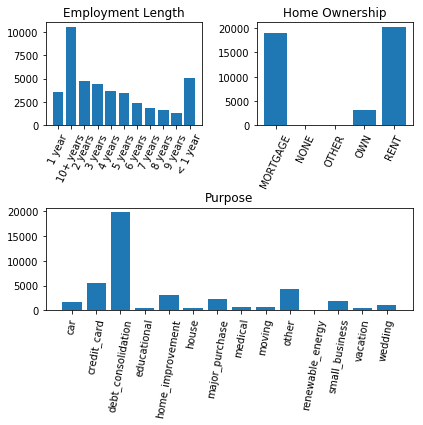

In [14]:
plt.subplot(212)
plt.bar(np.arange(1,15), df2.groupby(by='purpose').loan_amnt.count().values)
plt.xticks(np.arange(1,15),df2.groupby(by='purpose').loan_amnt.count().index,rotation='80')
plt.title('Purpose')

plt.subplot(2,2,1)
plt.bar(np.arange(1,12), df2.groupby(by='emp_length').loan_amnt.count().values)
plt.xticks(np.arange(1,12),df2.groupby(by='emp_length').loan_amnt.count().index,rotation='65')
plt.title('Employment Length')

plt.subplot(2,2,2)
plt.bar(np.arange(1,6), df2.groupby(by='home_ownership').loan_amnt.count().values)
plt.xticks(np.arange(1,6),df2.groupby(by='home_ownership').loan_amnt.count().index,rotation='65')
plt.title('Home Ownership')


plt.subplots_adjust(top=1.5, bottom=0.5, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.35)

#### Most people who apply loans Lending Club have been working for 10 years or more and rent houses. The mainly reason is for debt consolidation.

Text(0.5, 1.0, 'Annual Income VS Loan Amount')

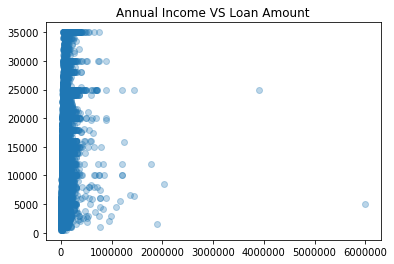

In [15]:
plt.scatter(df.annual_inc, df.loan_amnt,alpha=0.3)
plt.title('Annual Income VS Loan Amount')

#### One’s annual income is even up to six million and yet the loan amount is less than 10,000, and some others’ annual income is above one million but the loan amounts are not high at all. I do not think those are valid data.  In order to observe the trend it might have between annual income and loan amount, I limit the maximum of the x axis is 1,000,000. 

Text(0.5, 1.0, 'Annual Income VS Loan Amount')

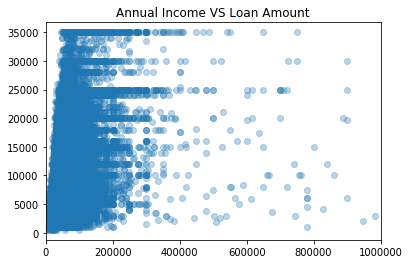

In [16]:
plt.scatter(df.annual_inc, df.loan_amnt,alpha=0.3)
plt.xlim(0,1000000)
plt.title('Annual Income VS Loan Amount')

#### It turns out most of the observations having an annual income less than 200,000. To get a closer look, I shrink the range of x axis to 200,000. 

Text(0.5, 1.0, 'Annual Income VS Loan Amount')

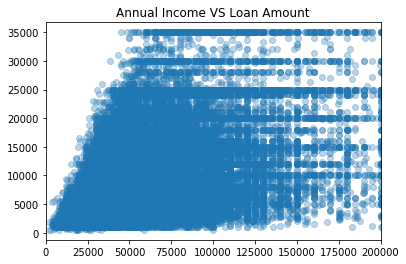

In [17]:
plt.scatter(df.annual_inc, df.loan_amnt,alpha=0.3)
plt.xlim(0,200000)
plt.title('Annual Income VS Loan Amount')

#### It looks like when the annual income goes up, the maximum of loan amount goes up. When one has an annual income around 50,000, he is likely to get a loan up to 35,000. However, no matter how much the annual income increases, the number of larger loan does not increase. For instance, then annual income is about 150,000, the majority loans have an amount just between 500 to 20,000.

#### Next, I plot dti, which is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income, against the loan amount. 

Text(0.5, 1.0, 'Dti VS Loan Amount')

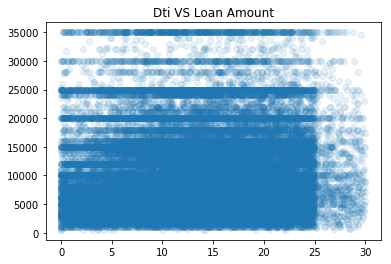

In [18]:
plt.scatter(df.dti, df.loan_amnt, alpha=0.1)
plt.title('Dti VS Loan Amount')

#### The number of issued loans drops hugely when dti is greater than 25. Other than that, I cannot tell any associations between these two. I plot the number of open accounts of borrowers against the loan amount.

Text(0.5, 1.0, 'Number of Open Accounts VS Loan Amount')

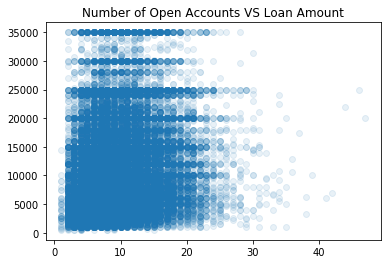

In [19]:
plt.scatter(df.open_acc,df.loan_amnt,alpha=0.1)
plt.title('Number of Open Accounts VS Loan Amount')

#### The graph can be splitted into two parts -- when the loan amount is below 25,000, it looks like more loans with higher amount, such as something from 15,000 to 25,000, are issued when the open account counts increase to about 10, and the number of such loans drops, once the number of open accounts are greater than 10. For those loans with very high amount, like from 25,000 to 35,000, it looks like the number of such loans issued is irrelevant with the number of open accounts. So far, I have not found any features that have a clear association with my target variable. I think it’s time to plot a heatmap and just to have an overall on the correlations between my variables.

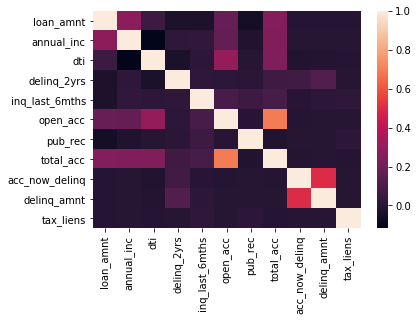

In [20]:
corr = df2.corr('pearson')

import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### The result is not nice. The feature with the highest correlation with the target variable is annual income and the pearson correlation score is around 0.3. I probably need to do some transformation on my features’ data, maybe a quadratic transformation. Besides that, it is noticeable that some features are quite highly correlated with each other, such as acc_now_delinq, the number of accounts on which the borrower is now delinquent, and delinq_amnt, the past-due amount owed for the accounts on which the borrower is now delinquent. A simpler model is always preferred, so I decide to drop the variable, delinq_amnt. 

In [21]:
df2.drop(['delinq_amnt'],axis=1,inplace=True)

# Train the Model

#### Start with a very simple model, only taking the numeric variables.

 I start to train a really simple model with only the numeric features. I choose to use Random Forest regressor first just because it is one of the most common used machine learning algorithms and it usually comes with good results. The data set is split into train and test tests. Fit the model with training data, predict on the test features data set, and compare the predictions with the actual target values in the test set to get the RMSE. 

In [22]:
X = df2.select_dtypes(exclude=['O']).drop(['loan_amnt'],axis=1)
y =  df2.loan_amnt

# Split into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=38)

# Create a RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
preds = reg.predict(X_test)
print('The RMSE of this simple modle is {:.04f}'.format(np.sqrt(mean_squared_error(preds,y_test))))

The RMSE of this simple modle is 7081.3163


In [23]:
preds[:10]

array([ 7655. ,  6020. , 12090. ,  8920. ,  6540. ,  6510. ,  4090. ,
       10200. , 12405. ,  7922.5])

In [24]:
y_test[:10]

4156      6400.0
20985     4000.0
40477    23500.0
31913    17500.0
12396     8325.0
9321     17000.0
40193     5000.0
40645    20500.0
10399     6825.0
23651     4000.0
Name: loan_amnt, dtype: float64

In [25]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,42535.0,11089.722581,7410.938391,500.0,5200.0,9700.00,15000.00,35000.00
annual_inc,42535.0,69135.697217,64093.396996,1896.0,40000.0,59000.00,82500.00,6000000.00
dti,42535.0,13.373043,6.726315,0.0,8.2,13.47,18.68,29.99
delinq_2yrs,42535.0,0.152345,0.512247,0.0,0.0,0.00,0.00,13.00
inq_last_6mths,42535.0,1.080686,1.527195,0.0,0.0,1.00,2.00,33.00
open_acc,42535.0,9.342353,4.495157,1.0,6.0,9.00,12.00,47.00
pub_rec,42535.0,0.058117,0.245634,0.0,0.0,0.00,0.00,5.00
total_acc,42535.0,22.119549,11.590351,1.0,13.0,20.00,29.00,90.00
acc_now_delinq,42535.0,0.000094,0.009697,0.0,0.0,0.00,0.00,1.00
tax_liens,42535.0,0.000024,0.004849,0.0,0.0,0.00,0.00,1.00


#### Consider it’s the loan amounts the model is trying to predict, it is not unsurprisingly to see a high mean square error, but a seven-thousand RMSE is still quite huge. Take a look at the first 10 predictions. Notice the predicted amounts are specific to ones, some even have values after decimal points. It is not necessary nor unrealistic to predict such specific loan amounts borrowers could get. Thus, it is a good idea to me to round both the predictions and the target values in the test set to the thousand’s place and then get the RMSE.

In [26]:
# Create a function that round both actualy loan amounts and predications to the one thousand's place
# and then return the squared root of mean squared error
def myRMSE(preds,ytests):
    
    rounded_preds = np.round(preds,decimals=-3)
    rounded_ytests = ytests.round(-3)
    
    return np.sqrt(mean_squared_error(rounded_preds,rounded_ytests))

In [27]:
X = df2.select_dtypes(exclude=['O']).drop(['loan_amnt'],axis=1)
y =  df2.loan_amnt

# Split into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X,y)

# Create a RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
print('The RMSE of this simple modle is {:.04f}'.format(np.sqrt(mean_squared_error(reg.predict(X_test),y_test))))
print('The rounded RMSE of this simple modle is {:.04f}'.format(myRMSE(reg.predict(X_test),y_test)))

The RMSE of this simple modle is 7065.6171
The rounded RMSE of this simple modle is 7071.5466


#### It looks that rounding the predicted values and the actual values does not really have any effect. 
#### I am going to try adding the categorical variables one by one, and see how the RMSE changes.

#### The amount of this data set is huge. 10 percent of it is enough to train a model, so I only take 5,000 to test what the effects on RMSE are when the categorical features are adding up one by one. Moreover, I realize that concluding whether the model is better,  just by looking at one RMSE of one test for each model, is likely to be attributed to chance, so I use the Repeated K-Fold cross validator. I set to repeat the 5-Fold cross validation for 10 times and for each repetition, I can have different splits, get different RMSE, and then get the averaged RMSE. Besides, even if the idea is to add the five categorical variables one by one, it is easier to drop one by one when applying with codes. I start a model with all the five categorical features as well as the numeric ones and delete the categorical variables. The result is showing that the model with all categorical features has the smallest RMSE, however, its RMSE is still more than six thousands.

In [28]:

# # Only use partial data to compare, 5000 observations are still good enough to build a model
y = df2.loan_amnt[10000:15000].values
X = df2.drop(['loan_amnt'],axis=1).iloc[10000:15000]

# Convert the categorical variables into numeric
X['emp_length2'] = X.emp_length.astype('category').cat.codes
X = pd.get_dummies(X.drop(['emp_length'],axis=1))

rmse = []
all_rmse = []
dropped_one_rmse = []
dropped_two_rmse = []
dropped_three_rmse = []
dropped_four_rmse = []

# Use RepeatedKFold so that an averaged RMSE can be calculated
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

reg = RandomForestRegressor()
scaler = sklearn.preprocessing.RobustScaler()

for train,test in rkf.split(X):
    
    X_train, X_test = X.iloc[train],X.iloc[test]
    y_train, y_test = y[train],y[test]
        
    # Model with all five categorical indicators
    reg.fit(scaler.fit_transform(X_train),y_train)
    preds = reg.predict(scaler.transform(X_test))
    
    rounded_preds = np.round(preds,decimals=-3)
    rounded_ytests = y_test.round(-3)
    diff = rounded_ytests-rounded_preds
    
    se = diff * diff
    mse = (se.sum())/len(diff)
    rmse_rounded = np.sqrt(mse)
    all_rmse.append(rmse_rounded)
    
   
    # Same train-test sets but without purpose_ columns
    
    X_train2 = X_train[X_train.columns.drop(list(X_train.filter(regex='purpose_')))]
    X_test2 = X_test[X_test.columns.drop(list(X_test.filter(regex='purpose_')))]
    reg.fit(scaler.fit_transform(X_train2),y_train)
    preds2 = reg.predict(scaler.transform(X_test2))
    
     
    rounded_preds2 = np.round(preds2,decimals=-3)
    diff2 = rounded_ytests-rounded_preds2
    se2 = diff2 * diff2
    mse2 = (se2.sum())/len(diff2)
    rmse_rounded2 = np.sqrt(mse2)
    dropped_one_rmse.append(rmse_rounded2)
    
    
    # Same train-test sets, continuing dropping verfication_status_ columnS
    
    X_train3 = X_train2[X_train2.columns.drop(list(X_train2.filter(regex='verification_status')))]
    X_test3 = X_test2[X_train2.columns.drop(list(X_train2.filter(regex='verification_status')))]
    reg.fit(scaler.fit_transform(X_train3),y_train)
    preds3 = reg.predict(scaler.transform(X_test3))
    
    rounded_preds3 = np.round(preds3,decimals=-3)
    diff3 = rounded_ytests-rounded_preds3
    se3 = diff3 * diff3
    mse3 = (se3.sum())/len(diff3)
    rmse_rounded3 = np.sqrt(mse3)
    dropped_two_rmse.append(rmse_rounded3)
    

    # Same train-test sets continuing dropping debt_settlement_flag_ columns
    
    X_train4 = X_train3[X_train3.columns.drop(list(X_train3.filter(regex='debt_')))]
    X_test4 = X_test3[X_test3.columns.drop(list(X_test3.filter(regex='debt_')))]
    reg.fit(scaler.fit_transform(X_train4),y_train)
    preds4 = reg.predict(scaler.transform(X_test4))
    
    rounded_preds4 = np.round(preds4,decimals=-3)
    diff4 = rounded_ytests-rounded_preds4
    se4 = diff4 * diff4
    mse4 = (se4.sum())/len(diff4)
    rmse_rounded4 = np.sqrt(mse4)
    dropped_three_rmse.append(rmse_rounded4)
    
    # Drop home_ownership_ columns as well
    X_train5 = X_train4[X_train4.columns.drop(list(X_train4.filter(regex='home')))]
    X_test5 = X_test4[X_test4.columns.drop(list(X_test4.filter(regex='home')))]
    reg.fit(scaler.fit_transform(X_train5),y_train)
    preds5 = reg.predict(scaler.transform(X_test5))

    rounded_preds5 = np.round(preds5,decimals=-3)
    diff5 = rounded_ytests-rounded_preds5
    
    se5 = diff5 * diff5
    mse5 = (se5.sum())/len(diff5)
    rmse_rounded5 = np.sqrt(mse5)
    dropped_four_rmse.append(rmse_rounded5)
    
    # Drop the last category columns, emp_length
    X_train6 = X_train5[X_train5.columns.drop(list(X_train5.filter(regex='emp_')))]
    X_test6 = X_test5[X_test5.columns.drop(list(X_test5.filter(regex='emp_')))]
    reg.fit(scaler.fit_transform(X_train6),y_train)
    preds6 = reg.predict(scaler.transform(X_test6))
    
    
    rounded_preds6 = np.round(preds6,decimals=-3)
    diff6 = rounded_ytests-rounded_preds6
    
    se6 = diff6 * diff6
    mse6 = (se6.sum())/len(diff6)
    rmse_rounded6 = np.sqrt(mse6)
    rmse.append(rmse_rounded6)
    

print('The averaged rmse of the model with all categorical indicators  is ', np.mean(all_rmse))
print('The averaged rmse of the model dropped one category variable is ',np.mean(dropped_one_rmse))
print('The averaged rmse of the model dropped two category variables is ',np.mean(dropped_two_rmse))
print('The averaged rmse of the model dropped three category variables is ',np.mean(dropped_three_rmse))
print('The aaveraged rmse of the model dropped four category variables is ',np.mean(dropped_four_rmse))
print('The averaged rmse of the numeric-variales-only model is ', np.mean(rmse))

The averaged rmse of the model with all categorical indicators  is  6725.8597193504775
The averaged rmse of the model dropped one category variable is  6954.102550723938
The averaged rmse of the model dropped two category variables is  7933.3084970183345
The averaged rmse of the model dropped three category variables is  7934.408875944154
The aaveraged rmse of the model dropped four category variables is  7949.010187180995
The averaged rmse of the numeric-variales-only model is  7988.764938047468


#### The model with all categorical varibales has the smallest RMSE, but the value is still huge. Maybe it is better to change a way to transform the data, for example, using the quardratic transformation.

In [29]:
 # # Only use partial data to compare, 5000 observations are still good enough to build a model
y = df2.loan_amnt[10000:15000].values
X = df2.drop(['loan_amnt'],axis=1).iloc[10000:15000]

# Convert the categorical variables into numeric
X['emp_length2'] = X.emp_length.astype('category').cat.codes
X = pd.get_dummies(X.drop(['emp_length'],axis=1))

rmse = []
transformed_rmse = []

reg = RandomForestRegressor()
# Quadratic features transform
poly = sklearn.preprocessing.PolynomialFeatures(2)

for train,test in rkf.split(X):
    X_train, X_test = X.iloc[train],X.iloc[test]
    y_train, y_test = y[train],y[test]
    
    reg.fit(X_train,y_train)
    preds = reg.predict(X_test)
    
    rounded_preds = np.round(preds,decimals=-3)
    rounded_ytests = y_test.round(-3)
    diff = rounded_ytests-rounded_preds
    se = diff * diff
    mse = (se.sum())/len(diff)
    rmse_rounded = np.sqrt(mse)
    rmse.append(rmse_rounded)
    
    reg.fit(poly.fit_transform(X_train),y_train)
    preds1 = reg.predict(poly.fit_transform(X_test))
    
    rounded_preds1 = np.round(preds1,decimals=-3)
    diff1 = rounded_ytests-rounded_preds1
    se1 = diff1 * diff1
    mse1 = (se1.sum())/len(diff1)
    rmse_rounded1 = np.sqrt(mse1)
    transformed_rmse.append(rmse_rounded1)

print('The RMSE of the original model is ', np.mean(rmse))
print('The RMSE of the transformed model is ', np.mean(transformed_rmse))

The RMSE of the original model is  6726.117812725047
The RMSE of the transformed model is  6706.693362868951


#### After quadratic transformation, the RMSE is a bitter smaller but this improvement is unspectacular. However, in real life, people are often okay with given a range of the amount they can borrow rather than a specific number before actually applying for the loans. Thus, I am going to bin those loan amounts and predications and see what the accuracy of predictions falling in th same range of the actual values.

#### To choose the number of bins and the widths of bins, a scatter plot of loan amount is needed.

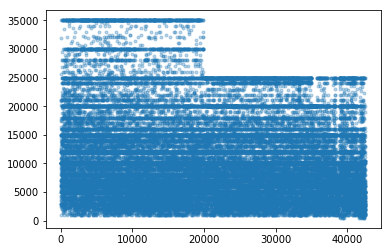

In [30]:
# Do a scatter plot of loan amounts with alpha=0.3 so that we can see
# where most points are scattered.
plt.plot(df2.loan_amnt,linestyle='none',marker='.',alpha=0.3)

#### There are clear thick lines lying in 35,000, 30,000, 25,000 and the rests cannot tell. It is better to do several subplots with different ranges of loan amounts.

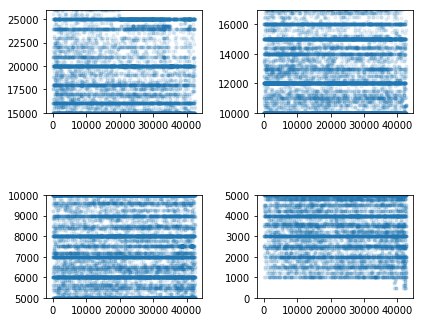

In [31]:
plt.subplot(2,2,1)
plt.plot(df2.loan_amnt,linestyle='none',marker='.',alpha=0.1)
plt.ylim([15000,26000])


plt.subplot(2,2,2)
plt.plot(df2.loan_amnt,linestyle='none',marker='.',alpha=0.1)
plt.ylim([10000,17000])

plt.subplot(2,2,3)
plt.plot(df2.loan_amnt,linestyle='none',marker='.',alpha=0.1)
plt.ylim([5000,10000])

plt.subplot(2,2,4)
plt.plot(df2.loan_amnt,linestyle='none',marker='.',alpha=0.1)
plt.ylim([0,5000])


plt.subplots_adjust(top=1.5, bottom=0.5, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.35)

#### There are clear thick lines lying in 35,000, 30,000, 25,000. When loan amount is between 15,000 and 25,000, it seems like a bin width of 2,000 is a good idea since there is a clear line every 2,000. When loan amount is between 10,000 and 15,000, there is a line every 1,000 , so the bin width should be 1,000. Same thing with the loan amount between 1,000 and 10,000, a clear line every thousand. 

In [32]:
# Define a function to create bins
def create_bins(lower_bound,upper_bound,width):
    bins = []
    for i in range(lower_bound,upper_bound,width):
        bins.append((i,i+width))
    return bins

In [33]:
# create a list of bins 
bins = create_bins(0,15000,1000)
bins.extend(create_bins(15000,25000,2000))
bins.extend(create_bins(25000,35000,5000))

# use pandas.cut to bin loan amounts
bins2 = pd.IntervalIndex.from_tuples(bins)
classes = pd.cut(df2.loan_amnt,bins2,include_lowest=True)
bins2 = pd.IntervalIndex.from_tuples(bins)

In [36]:
pred_y_bins = pd.cut(preds1,bins2,include_lowest=True)
act_ytest_bins = pd.cut(y_test,bins2,include_lowest=True)
accuracy = pd.Series(pred_y_bins).eq(act_ytest_bins)
print('The accuracy is ',np.sum(accuracy)/len(accuracy), '.')

The accuracy is  0.084 .


#### The accuracy turned out to be very low as well. 

#### Finally, I am going to tune the hyperparameters of the random forest regressor to improve the model's performance

In [37]:

X = df2.drop(['loan_amnt'],axis=1)
y = df2.loan_amnt
X['emp_length2'] = X.emp_length.astype('category').cat.codes
X = pd.get_dummies(X.drop(['emp_length'],axis=1))

X_train,X_test,y_train,y_test = train_test_split(X,y)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
# Minimun number of samples required to split a node
min_samples_split = [2,5,10]
# Minimun number of samples required at each leaf node
min_samples_leaf = [1,2,4]
# Method of selection samples for training each tree
bootstrap = [True,False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
reg = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, search across
# 100 different combinations, and use all available cores
reg_random = RandomizedSearchCV(estimator=reg, param_distributions=random_grid,
                               n_iter=100,cv=3,verbose=2,random_state=42,
                                n_jobs=-1)

reg_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 263.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 409.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [38]:
reg_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1600}

In [39]:
def evaluate(model,X_test,y_test):
    preds = model.predict(X_test)
    
    rounded_preds = np.round(preds,decimals=-3)
    rounded_ytests = y_test.round(-3)
    diff = rounded_ytests-rounded_preds
    rmse = np.sqrt(mean_squared_error(rounded_preds,rounded_ytests))
    
    print('RMSE = {:0.2f}.'.format(rmse))
    
    return rmse

base_model = RandomForestRegressor()
base_model.fit(X_train,y_train)
base_rmse = evaluate(base_model,X_test,y_test)

RMSE = 6167.93.


In [40]:
best_random = reg_random.best_estimator_
random_rmse = evaluate(best_random,X_test,y_test)

RMSE = 5767.17.


#### My conclusion 

This data set is bad to build a model which predicts the loan amount. When I try to search methods to improve my model, I find several other projects using the same loan data. However, the goal of those projects is to predict the default rate and they are able to get some decent results. It actually makes sense why the data downloaded from Lending Club does not work out for predicting loan amount after I did more research on the company. Here is how it works -- potential borrowers complete applications online where they will enter their needed loan amount; Lending Club leverage online data and assign appropriate interest rates to potential borrowers; potential borrowers choose an offer. The maximum personal loan amount is \\$40,000. It actually makes sense why the data downloaded from Lending Club does not work out for predicting loan amount after I did more research on the company. Here is how it works in Lending Club -- potential borrowers complete applications online where they will enter their needed loan amount; Lending Club leverages online data and assigns appropriate interest rates to potential borrowers; potential borrowers choose an offer. The maximum personal loan amount is \\$40,000. Thus, the loan amount in this data set was more subjected to the borrowers’ wants or needs, and less subjected to the facts of them, such as employment length and annual income.
